In [80]:
import matplotlib
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [81]:
from detector import detector

In [82]:
import warnings
warnings.filterwarnings("ignore")

                     STARTING DETECTOR

Device: cpu
config/yolov3.cfg

Performing object detection:
	+ Batch 0, Inference Time: 0:00:00.713356
	+ Batch 1, Inference Time: 0:00:00.687264

Iterating images:
(0) Image: 'data/images/batch/assortment_0.JPG' (1168, 704)
	[Det 1]	+ Prediction: bottle (0.999) Brewdog_Punk_IPA
	[Det 2]	+ Prediction: bottle (1.000) Five_Points_Pale
	[Det 3]	+ Prediction: bottle (0.997) Camden_Hells_Lager
	[Det 4]	+ Prediction: bottle (1.000) Enefeld_American_Rye_Larger
	[Det 5]	+ Prediction: bottle (0.999) Crate_IPA


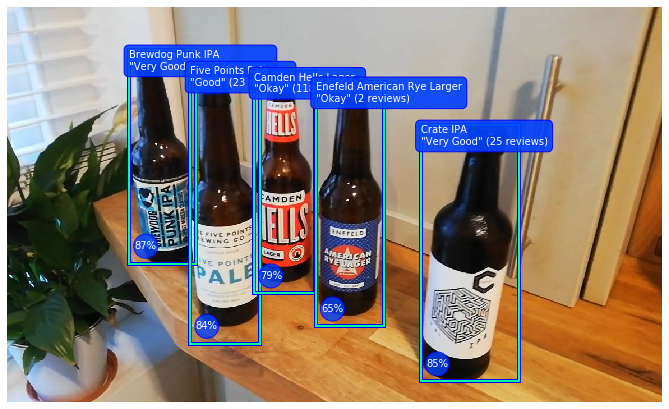

(1) Image: 'data/images/batch/assortment_small.JPG' (613, 459)
	[Det 0]	+ Prediction: bottle (0.998) Crate_IPA
	[Det 1]	+ Prediction: bottle (1.000) Five_Points_Pale
	[Det 2]	+ Prediction: bottle (1.000) Camden_Hells_Lager
	[Det 3]	+ Prediction: bottle (0.999) Five_Points_Pale
	[Det 4]	+ Prediction: bottle (0.999) Enefeld_American_Rye_Larger


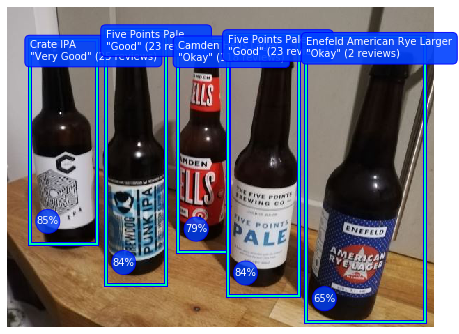

In [215]:
class Opt:
    image_folder = 'data/images/batch/'
    show_img = True
    save_fig = True
    
    model_def = "config/yolov3.cfg"
    weights_path = "weights/yolov3.weights"
    class_path = "data/coco.names"
    
    conf_thres = 0.8
    nms_thres = 0.4
    batch_size = 1
    n_cpu = 0
    img_size = 416
    
opt = Opt()

imgs, dets = detector(opt)

                     STARTING DETECTOR

Device: cpu
config/yolov3.cfg

Performing object detection:
	+ Batch 0, Inference Time: 0:00:00.671848
	+ Batch 1, Inference Time: 0:00:00.663395
	+ Batch 2, Inference Time: 0:00:00.660847

Iterating images:
(0) Image: 'data/images/assortment_1.JPG'
data/images/assortment_1.JPG
	[Det 0]	+ Prediction: bottle (0.999) Crate_IPA
	[Det 1]	+ Prediction: bottle (1.000) Brewdog_Punk_IPA
	[Det 2]	+ Prediction: bottle (1.000) Camden_Hells_Lager
	[Det 3]	+ Prediction: bottle (1.000) Five_Points_Pale
	[Det 4]	+ Prediction: bottle (0.999) Enefeld_American_Rye_Larger


<Figure size 432x288 with 0 Axes>

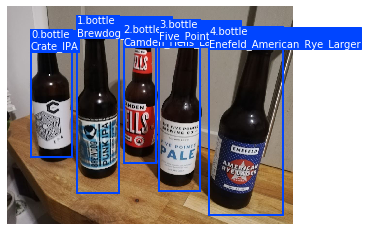

(1) Image: 'data/images/assortment_small.JPG'
data/images/assortment_small.JPG
	[Det 0]	+ Prediction: bottle (0.998) Crate_IPA
	[Det 1]	+ Prediction: bottle (1.000) Five_Points_Pale
	[Det 2]	+ Prediction: bottle (1.000) Camden_Hells_Lager
	[Det 3]	+ Prediction: bottle (0.999) Five_Points_Pale
	[Det 4]	+ Prediction: bottle (0.999) Enefeld_American_Rye_Larger


<Figure size 432x288 with 0 Axes>

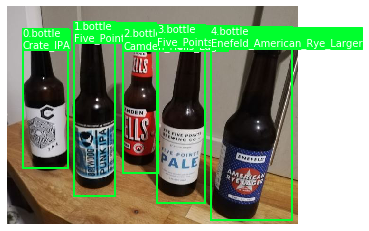

(2) Image: 'data/images/bottle.JPG'
data/images/bottle.JPG
	[Det 1]	+ Prediction: bottle (0.998) Enefeld_American_Rye_Larger


<Figure size 432x288 with 0 Axes>

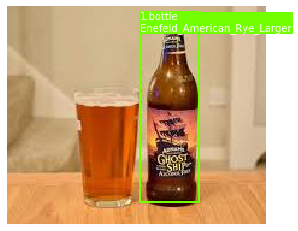

In [15]:
# Previous run config

class Opt:
    image_folder = 'data/images/'
    show_img = True
    save_fig = False
    
    model_def = "config/yolov3.cfg"
    weights_path = "weights/yolov3.weights"
    class_path = "data/coco.names"
    
    conf_thres = 0.8
    nms_thres = 0.4
    batch_size = 1
    n_cpu = 0
    img_size = 416
    
opt = Opt()

imgs, dets = detector(opt)

## Testing on sample set

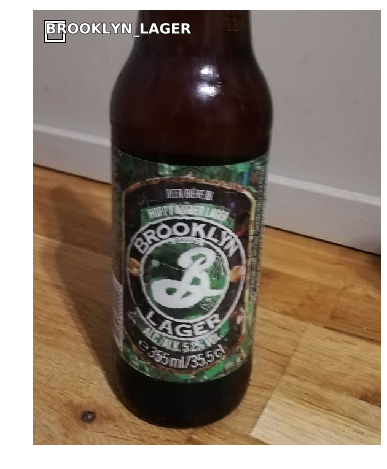

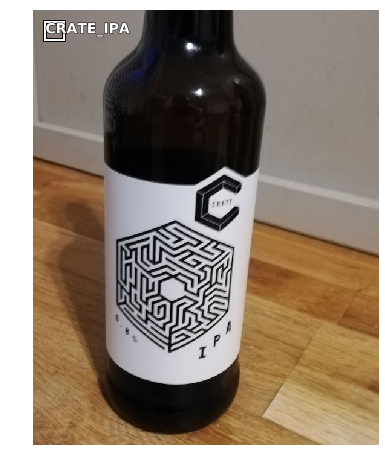

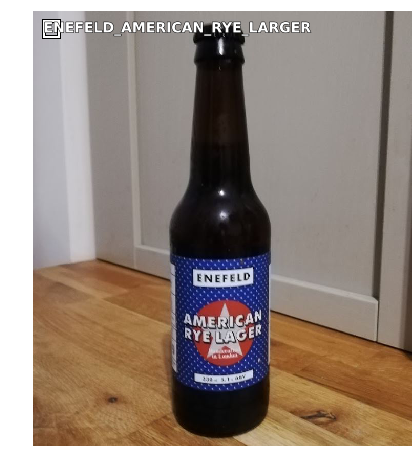

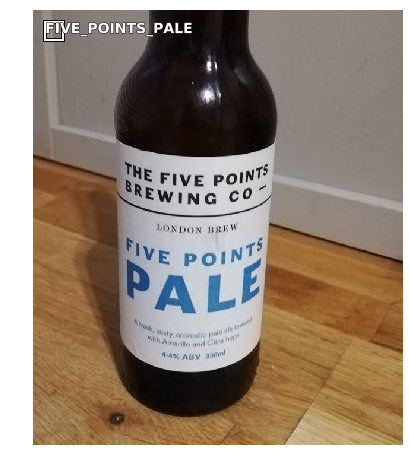

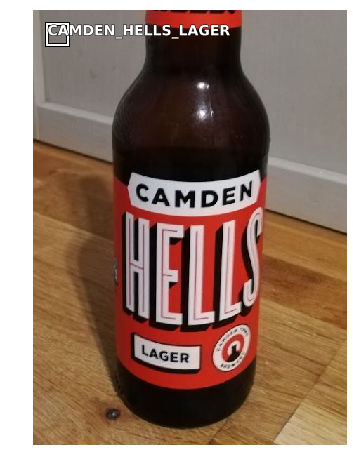

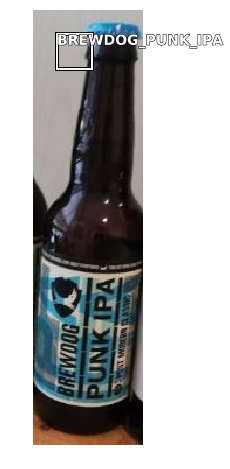

In [11]:
from fastai.vision import load_learner, open_image, ImageBBox
from pathlib import Path
import glob

# -------------------- LOAD CLASSIFICATION MODEL ------------------- #
# Fastai craft brands
c_path = Path('data/training')
learn = load_learner(c_path)
# ------------------------------------------------------------------ #

shots = glob.glob('data/images/singles/*')
for shot in shots:
    img = open_image(shot)
    pred_class,pred_idx,outputs = learn.predict(img)
    
    bbox = ImageBBox.create(*img.size, [[20, 50, 50, 20]],
                        labels=[0], classes=[pred_class.__str__().upper()])
    img.show(figsize = (8, 8), y=bbox)